<a href="https://colab.research.google.com/github/LordMelodias/Data-Analytics/blob/main/hotelbooking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
**This analysis examines booking and cancellation patterns across various factors such as lead time, month, meal type, customer type, distribution channel, and country. By evaluating these factors, we aim to understand trends and identify key drivers behind booking cancellations.**

**Data Columns Info**

hotel: Indicates the type of hotel, e.g., "Resort Hotel."

is_canceled: A binary value where 1 indicates the booking was canceled, and 0 indicates it was not.

lead_time: Number of days between the booking date and the arrival date.

arrival_date_year: The year of arrival.

arrival_date_month: The month of arrival.

arrival_date_week_number: The week number of the year when the booking starts.

arrival_date_day_of_month: The day of the month when the booking starts.

stays_in_weekend_nights: Number of weekend nights (Saturday, Sunday) the guest stayed.

stays_in_week_nights: Number of weeknights (Monday to Friday) the guest stayed.
adults: Number of adults in the booking.

customer_type: Describes the type of booking (e.g., "Transient," meaning individual bookings not part of a group).

adr: Average Daily Rate, the amount the guest paid per day of the stay.

required_car_parking_spaces: Number of parking spaces required by the guest.

total_of_special_requests: Total number of special requests made by the guest (e.g., extra bed, quiet room).

reservation_status: The status of the booking (e.g., "Check-Out" indicates the guest has completed their stay).

reservation_status_date: The date on which the status was updated.

name: The guest’s name.

email: The guest’s email address.

phone-number: The guest’s phone number.

credit_card: The last 4 digits of the guest’s credit card.

In [237]:
import pandas as pd
import numpy as np

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
dt = pd.read_csv('https://raw.githubusercontent.com/LordMelodias/Data-Analytics/main/hotel_booking.csv')

In [240]:
dt.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [241]:
dt.shape

(119390, 36)

In [242]:
dt.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [243]:
# List of columns with missing values
missing_columns = ['agent', 'company']

# Drop columns with missing values
dt = dt.drop(columns=missing_columns)

In [244]:
# Drop null values
dt.dropna(inplace=True)

In [245]:
dt.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [246]:
# Convert lead_time to months (approximate by dividing by 30)
dt['lead_time_months'] = (dt['lead_time'] / 30).apply(np.ceil)  # Round up to the nearest month

In [247]:
dt['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [248]:
dt['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [249]:
dt = dt[dt['distribution_channel'] != 'Undefined']

In [250]:
dt = dt[dt['meal'] != 'Undefined']

In [251]:
dt['lead_time_months'].unique()

array([12., 25.,  1.,  0.,  3.,  2.,  5.,  4., 13., 11.,  9., 10., 14.,
       16.,  6.,  7.,  8., 24., 15., 19., 18., 21., 17., 20.])

In [252]:
dt.shape

(117732, 35)

In [253]:
dt.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card', 'lead_time_months'],
      dtype='object')

#**Cancellation Rate vs Lead Time**

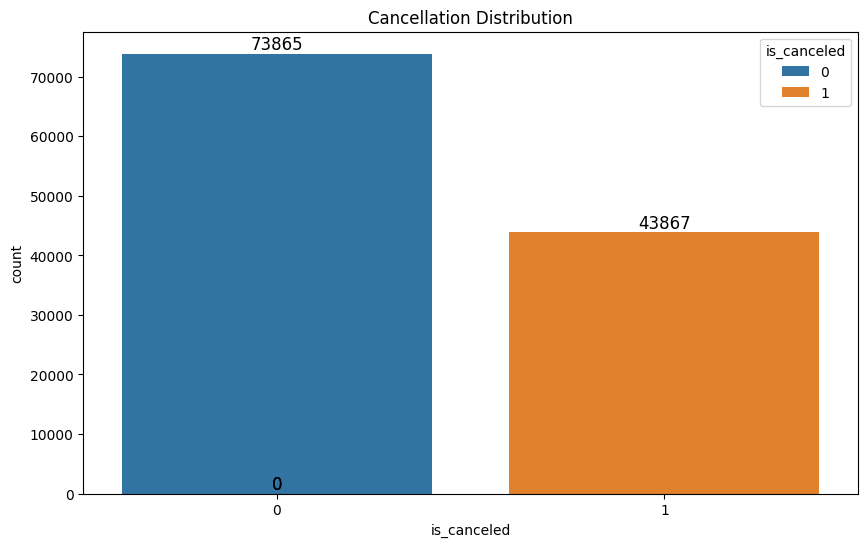

In [254]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='is_canceled', hue='is_canceled', data=dt)
plt.title('Cancellation Distribution')

# Add value labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                     textcoords='offset points')

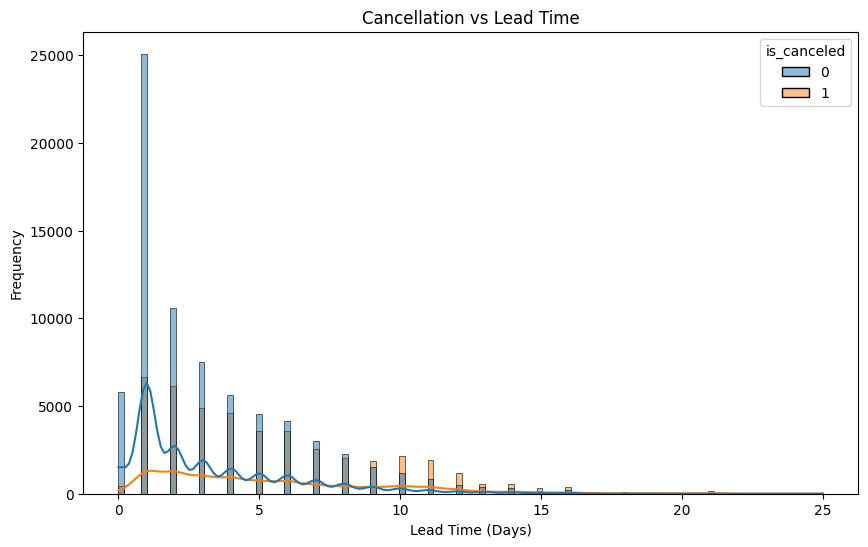

In [255]:
plt.figure(figsize=(10,6))
sns.histplot(data=dt, x='lead_time_months', hue='is_canceled', kde=True)
plt.title('Cancellation vs Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()

In [256]:
# Group by lead_time_months and is_canceled, then count occurrences
monthly_cancellation_counts = dt.groupby(['lead_time_months', 'is_canceled']).size().unstack(fill_value=0)

# Print the table
print("Lead Time (Months) | Canceled | Not Canceled | Total")
print("-" * 50)
for month in monthly_cancellation_counts.index:
    canceled = monthly_cancellation_counts.loc[month, 1]
    not_canceled = monthly_cancellation_counts.loc[month, 0]
    total = canceled + not_canceled
    print(f"{month:<18} | {canceled:<8} | {not_canceled:<12} | {total}")

Lead Time (Months) | Canceled | Not Canceled | Total
--------------------------------------------------
0.0                | 415      | 5803         | 6218
1.0                | 6681     | 25093        | 31774
2.0                | 6140     | 10616        | 16756
3.0                | 4877     | 7518         | 12395
4.0                | 4589     | 5654         | 10243
5.0                | 3566     | 4523         | 8089
6.0                | 3590     | 4152         | 7742
7.0                | 2544     | 3035         | 5579
8.0                | 2032     | 2260         | 4292
9.0                | 1846     | 1544         | 3390
10.0               | 2179     | 1194         | 3373
11.0               | 1918     | 834          | 2752
12.0               | 1201     | 512          | 1713
13.0               | 544      | 411          | 955
14.0               | 566      | 303          | 869
15.0               | 341      | 145          | 486
16.0               | 356      | 199          | 555
17.0        

**Bookings with shorter lead times are more likely to be canceled, while longer lead times generally see fewer cancellations and lower total bookings.**

#**What are the peak periods for bookings?**

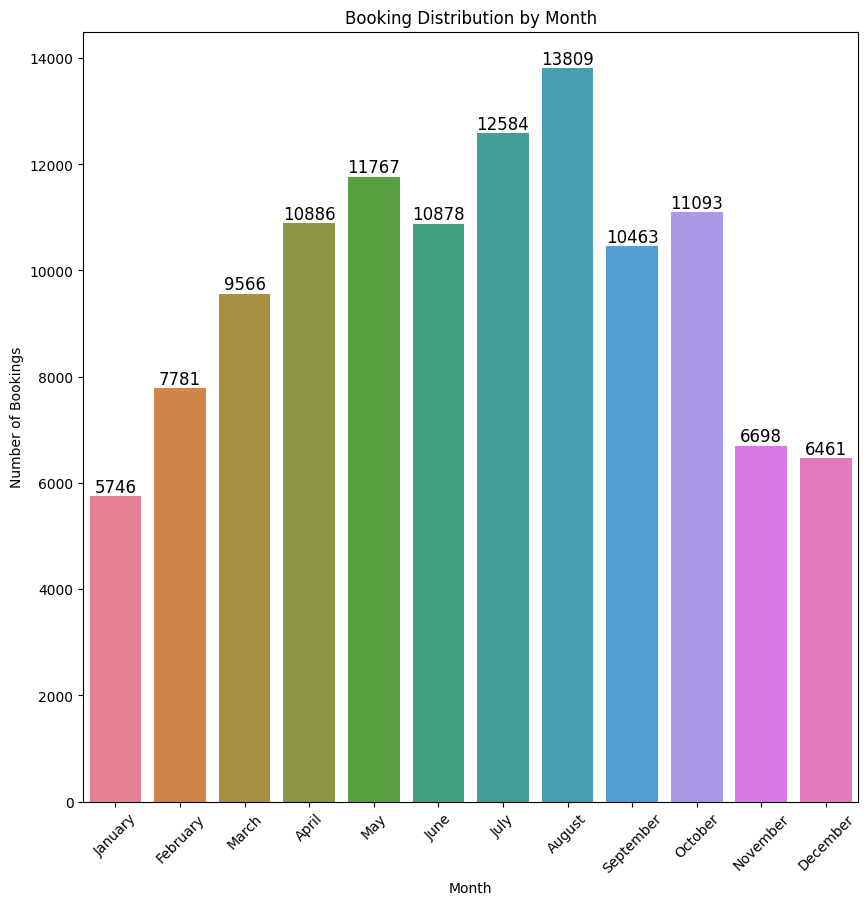

In [257]:
# Define the correct order for the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'arrival_date_month' to a categorical type with specified order
dt['arrival_date_month'] = pd.Categorical(dt['arrival_date_month'], categories=month_order, ordered=True)

# Visualization
plt.figure(figsize=(10, 10))
ax = sns.countplot(x='arrival_date_month', hue='arrival_date_month', data=dt, order=month_order)

# Add value labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.title('Booking Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

In [258]:
peak_booking_months = dt['arrival_date_month'].value_counts().reset_index()
peak_booking_months = peak_booking_months.T
peak_booking_months

,0,1,2,3,4,5,6,7,8,9,10,11
arrival_date_month,August,July,May,October,April,June,September,March,February,November,December,January
count,13809,12584,11767,11093,10886,10878,10463,9566,7781,6698,6461,5746


**August, July and May months show the highest booking, they are peak periods.**

#**Monthly Cancellation Trends**

<ipython-input-259-2f1c90623a4d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_cancellation_rates = dt.groupby('arrival_date_month')['is_canceled'].sum().reset_index()


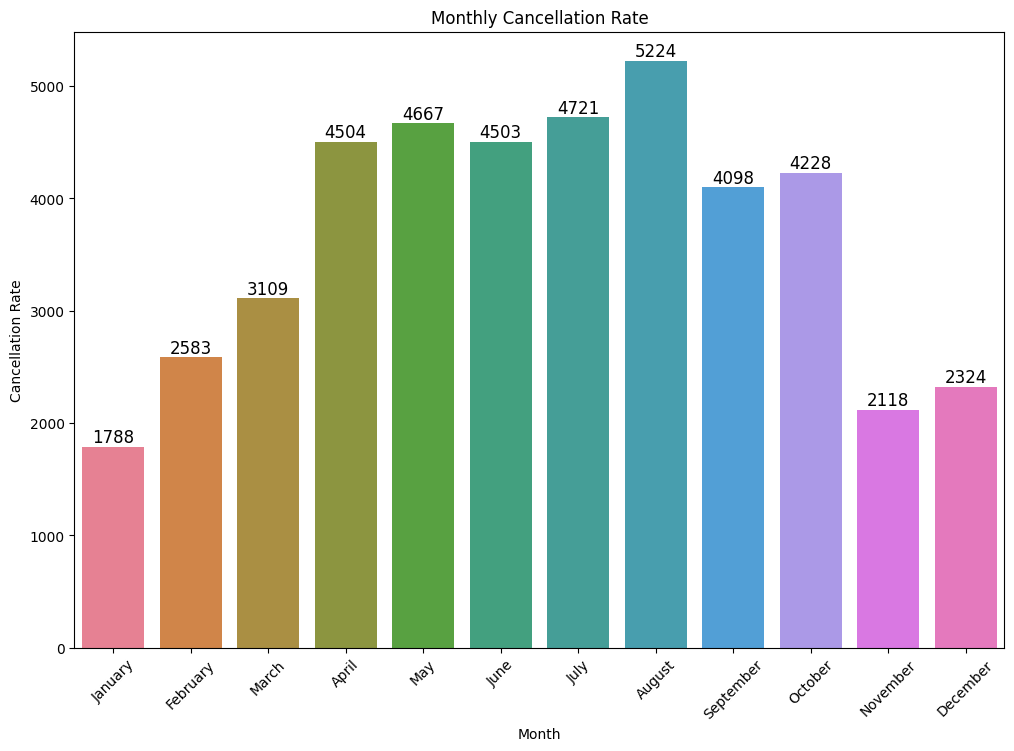

In [259]:
monthly_cancellation_rates = dt.groupby('arrival_date_month')['is_canceled'].sum().reset_index()
# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='arrival_date_month', y='is_canceled', data=monthly_cancellation_rates, hue='arrival_date_month')
# Add value labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                textcoords='offset points')
plt.title('Monthly Cancellation Rate')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

In [260]:
ct = monthly_cancellation_rates.sort_values(by='is_canceled', ascending=False)
ct = ct.reset_index()
ct = ct.T
ct

,0,1,2,3,4,5,6,7,8,9,10,11
index,7,6,4,3,5,9,8,2,1,11,10,0
arrival_date_month,August,July,May,April,June,October,September,March,February,December,November,January
is_canceled,5224,4721,4667,4504,4503,4228,4098,3109,2583,2324,2118,1788


**August experiences the highest number of cancellations, while January and November see the fewest cancellations.**

#**Cancellation Rate Analysis by Meal Type**

In [261]:
# Calculate the total number of bookings and cancellations by meal type
meal_cancellation_counts = dt.groupby('meal')['is_canceled'].agg(['sum', 'count'])
meal_cancellation_counts.columns = ['cancellations', 'total_bookings']

# Calculate the cancellation rate
meal_cancellation_counts['cancellation_rate'] = meal_cancellation_counts['cancellations'] / meal_cancellation_counts['total_bookings']
meal_cancellation_counts

,cancellations,total_bookings,cancellation_rate
meal,,,
BB,34452,91863,0.375037
FB,478,798,0.598997
HB,4981,14433,0.345112
SC,3956,10638,0.371874


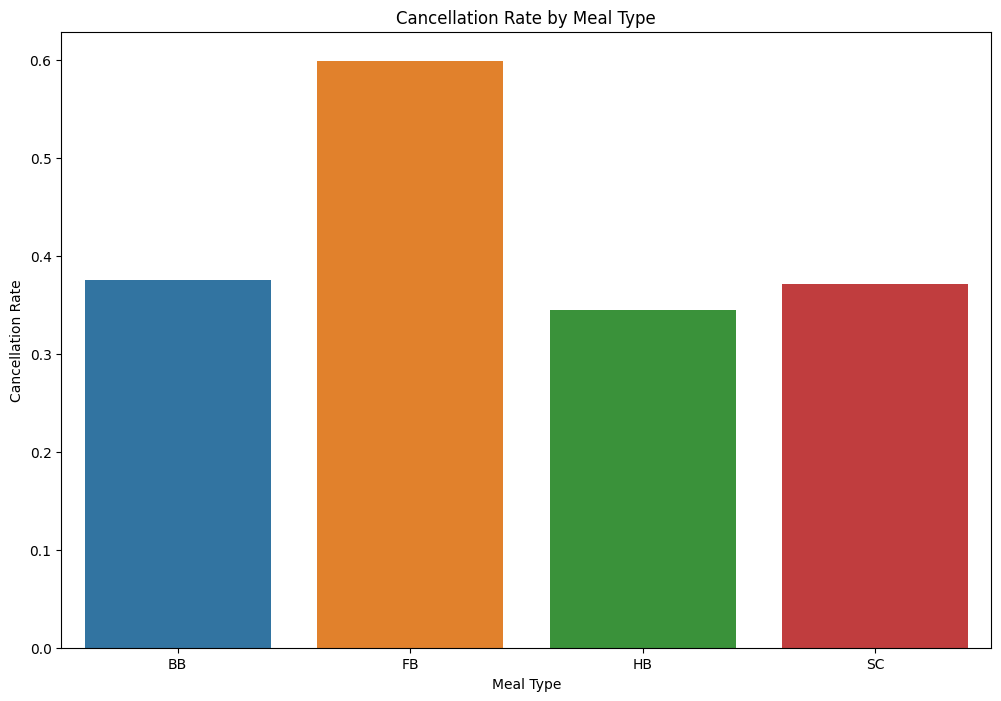

In [262]:
# Plot the cancellation rates by meal type
plt.figure(figsize=(12, 8))
sns.barplot(data=meal_cancellation_counts.reset_index(), x='meal', y='cancellation_rate', hue='meal')
plt.title('Cancellation Rate by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Cancellation Rate')
plt.show()

**Full Board (FB) has the highest cancellation rate (60%), indicating it is the most frequently canceled meal type, while Bed & Breakfast (BB) and Self-Catering (SC) have similar cancellation rates around 37%, and Half Board (HB) has the lowest cancellation rate (34%)**

#**Impact of Customer Type on Cancellation**

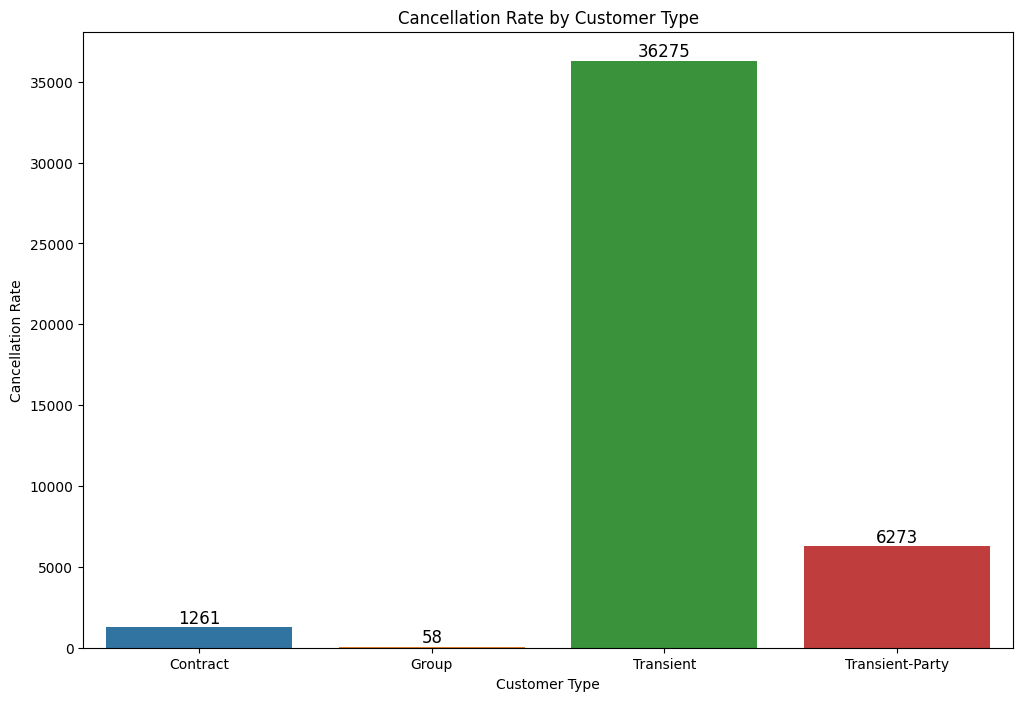

In [263]:
customer_cancellation_rates = dt.groupby('customer_type')['is_canceled'].sum().reset_index()

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=customer_cancellation_rates, x='customer_type', y='is_canceled', hue='customer_type')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                textcoords='offset points')
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.show()


In [264]:
ct = customer_cancellation_rates.sort_values(by='is_canceled', ascending=False)
ct = ct.reset_index()
ct = ct.T
ct

,0,1,2,3
index,2,3,0,1
customer_type,Transient,Transient-Party,Contract,Group
is_canceled,36275,6273,1261,58


**Transient bookings have the highest number of cancellations, while Group bookings have the fewest.**

#**Cancellation Rate analysis by Booking Source**

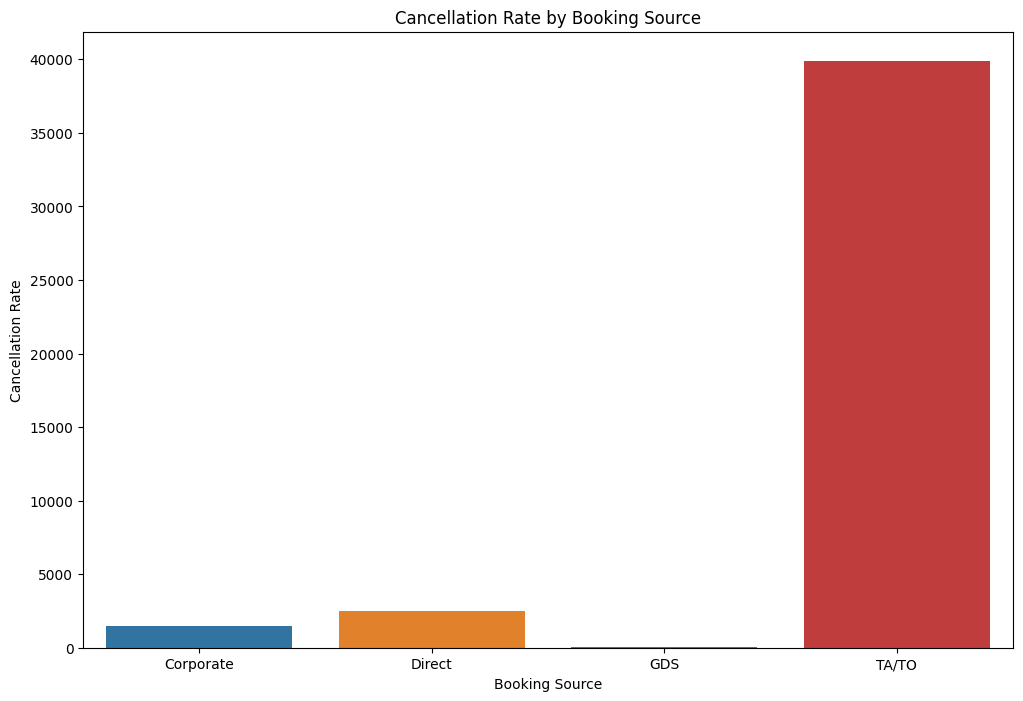

In [265]:
source_cancellation_rates = dt.groupby('distribution_channel')['is_canceled'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=source_cancellation_rates, x='distribution_channel', y='is_canceled', hue='distribution_channel')
plt.title('Cancellation Rate by Booking Source')
plt.xlabel('Booking Source')
plt.ylabel('Cancellation Rate')
plt.show()

TA/TO: Travel Agents / Tour Operators

Direct: Direct Booking by Customers

Corporate: Corporate Bookings

GDS: Global Distribution System

In [266]:
ct = source_cancellation_rates.sort_values(by='is_canceled', ascending=False)
ct = ct.reset_index()
ct = ct.T
ct

,0,1,2,3
index,3,1,0,2
distribution_channel,TA/TO,Direct,Corporate,GDS
is_canceled,39884,2502,1444,37


**TA/TO distribution channel has the highest number of cancellations, while GDS has the fewest**

#**Cancellation Rate by Top 5 Countries**

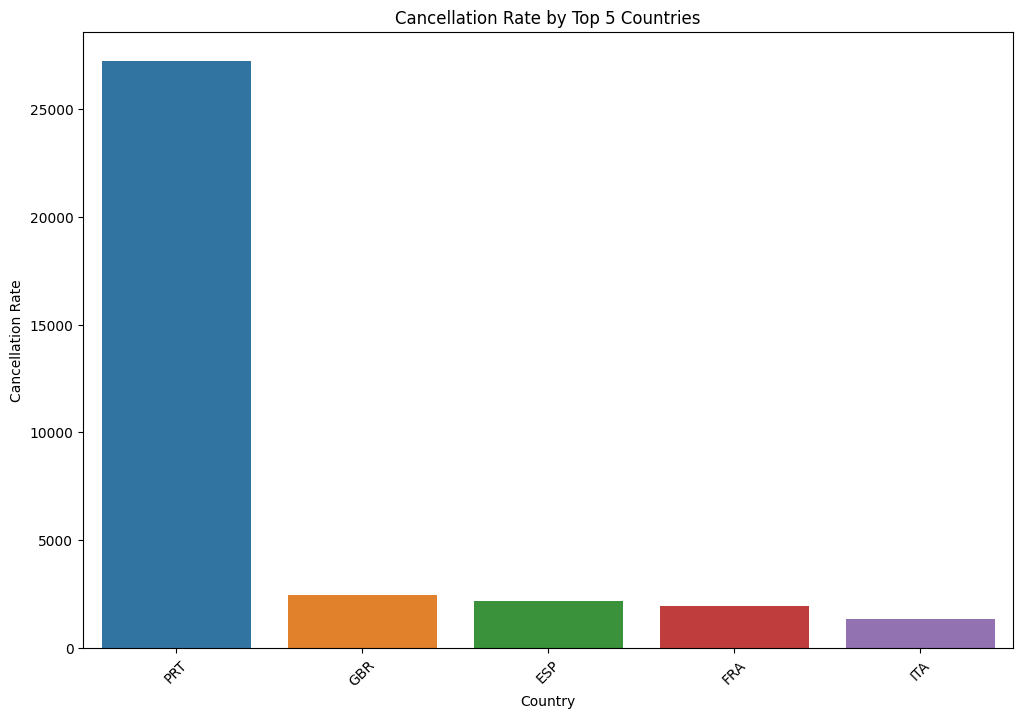

In [267]:
# Calculate cancellation rates by country
country_cancellation_rates = dt.groupby('country')['is_canceled'].sum().sort_values(ascending=False)
# Get the top 5 countries with the highest cancellation rates
top_5_countries = country_cancellation_rates.head(5)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_5_countries.index, y=top_5_countries.values, hue=top_5_countries.index)
plt.title('Cancellation Rate by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

In [269]:
ct = top_5_countries.sort_values(ascending=False)
ct = ct.reset_index()
ct = ct.T
ct

,0,1,2,3,4
country,PRT,GBR,ESP,FRA,ITA
is_canceled,27240,2453,2168,1934,1333


**Portugal (PRT) has the highest number of cancellations, followed by Great Britain (GBR), Spain (ESP), France (FRA), and Italy (ITA).**

#Final Conclusion
**Bookings with shorter lead times are more likely to be canceled, whereas longer lead times generally result in fewer cancellations and lower booking volumes. Peak booking periods occur in August, July, and May, with August also experiencing the highest number of cancellations. Meal types such as Full Board (FB) have the highest cancellation rates, while Bed & Breakfast (BB) and Self-Catering (SC) have moderate rates, and Half Board (HB) has the lowest. Among customer types, Transient bookings see the most cancellations, while Group bookings see the fewest. The TA/TO distribution channel records the highest cancellations, while GDS has the lowest. Portugal leads in cancellation numbers, followed by Great Britain, Spain, France, and Italy**